# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [554]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

diabetes_df = pd.read_csv('diabetes.csv')

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [498]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [499]:
#check the means of each value to see if i should split the data by outcome before imputation
diabetic_mean = diabetes_df[diabetes_df['Outcome'] == 1].mean()
non_diabetic_mean = diabetes_df[diabetes_df['Outcome'] == 0].mean()

means_df = pd.DataFrame({'Diabetic Mean': diabetic_mean, 'Non-Diabetic Mean': non_diabetic_mean})

means_df

,Diabetic Mean,Non-Diabetic Mean
Pregnancies,4.865672,3.298000
Glucose,141.257463,109.980000
BloodPressure,70.824627,68.184000
SkinThickness,22.164179,19.664000
Insulin,100.335821,68.792000
BMI,35.142537,30.304200
DiabetesPedigreeFunction,0.550500,0.429734
Age,37.067164,31.190000
Outcome,1.000000,0.000000


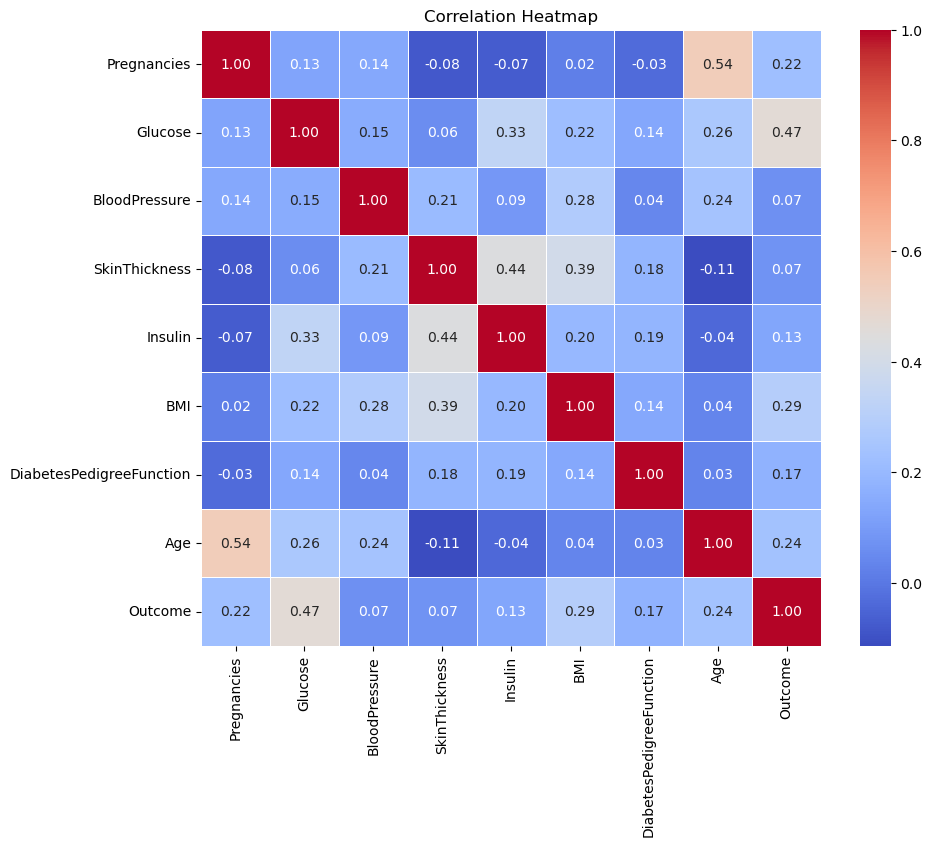

In [500]:
"""
Created a heatmap to see the correlation between outcome and the independent variables prior to imputation 
so that I can ensure that the imputation techniques used don't dramatically affect the outcome
"""

corr_matrix = diabetes_df.corr()
# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [501]:
#look for outliers or values that do not make empiracle sense
diabetes_df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [502]:
# Calculate the mean insulin for non-diabetic individuals
mean_insulin_non_diabetic = diabetes_df[diabetes_df['Outcome'] == 0]['Insulin'].mean()

# Create a mask for non-diabetic individuals with insulin values equal to zero
non_diabetic_insulin_mask = (diabetes_df['Outcome'] == 0) & (diabetes_df['Insulin'] == 0)

# Impute the values using np.where()
diabetes_df['Insulin'] = np.where(non_diabetic_insulin_mask, mean_insulin_non_diabetic, diabetes_df['Insulin'])

#do the same for diabetic patients
# Calculate the mean insulin for non-diabetic individuals
mean_insulin_diabetic = diabetes_df[diabetes_df['Outcome'] == 1]['Insulin'].mean()

# Create a mask for non-diabetic individuals with insulin values equal to zero
diabetic_insulin_mask = (diabetes_df['Outcome'] == 1) & (diabetes_df['Insulin'] == 0)

# Impute the values using np.where()
diabetes_df['Insulin'] = np.where(diabetic_insulin_mask, mean_insulin_diabetic, diabetes_df['Insulin'])

#convert back to type int
diabetes_df['Insulin'] = diabetes_df['Insulin'].astype(int)


In [503]:
#look for outliers or values that do not make empiracle sense
diabetes_df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

In [504]:
# Calculate the mean BMI for non-diabetic individuals
mean_bmi_non_diabetic = round(diabetes_df[diabetes_df['Outcome'] == 0]['BMI'].mean(), 2)

# Create a mask for non-diabetic individuals with BMI values equal to zero
non_diabetic_bmi_mask = (diabetes_df['Outcome'] == 0) & (diabetes_df['BMI'] == 0)

# Impute the values using np.where()
diabetes_df['BMI'] = np.where(non_diabetic_bmi_mask, mean_bmi_non_diabetic, diabetes_df['BMI'])

# Do the same for diabetic patients
# Calculate the mean BMI for diabetic individuals
mean_bmi_diabetic = diabetes_df[diabetes_df['Outcome'] == 1]['BMI'].mean()

# Create a mask for diabetic individuals with BMI values equal to zero
diabetic_bmi_mask = (diabetes_df['Outcome'] == 1) & (diabetes_df['BMI'] == 0)

# Impute the values using np.where()
diabetes_df['BMI'] = np.where(diabetic_bmi_mask, mean_bmi_diabetic, diabetes_df['BMI'])


In [505]:
diabetes_df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [506]:
# Calculate the mean SkinThickness for non-diabetic individuals
mean_skin_thickness_non_diabetic = diabetes_df[diabetes_df['Outcome'] == 0]['SkinThickness'].mean()

# Create a mask for non-diabetic individuals with SkinThickness values equal to zero
non_diabetic_skin_thickness_mask = (diabetes_df['Outcome'] == 0) & (diabetes_df['SkinThickness'] == 0)

# Impute the values using np.where()
diabetes_df['SkinThickness'] = np.where(non_diabetic_skin_thickness_mask, mean_skin_thickness_non_diabetic, diabetes_df['SkinThickness'])

# Do the same for diabetic patients
# Calculate the mean SkinThickness for diabetic individuals
mean_skin_thickness_diabetic = diabetes_df[diabetes_df['Outcome'] == 1]['SkinThickness'].mean()

# Create a mask for diabetic individuals with SkinThickness values equal to zero
diabetic_skin_thickness_mask = (diabetes_df['Outcome'] == 1) & (diabetes_df['SkinThickness'] == 0)

# Impute the values using np.where()
diabetes_df['SkinThickness'] = np.where(diabetic_skin_thickness_mask, mean_skin_thickness_diabetic, diabetes_df['SkinThickness'])

# Convert back to type int
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].astype(int)

In [507]:
# Calculate the mean BloodPressure for non-diabetic individuals
mean_bp_non_diabetic = diabetes_df[diabetes_df['Outcome'] == 0]['BloodPressure'].mean()

# Create a mask for non-diabetic individuals with BloodPressure values equal to zero
non_diabetic_bp_mask = (diabetes_df['Outcome'] == 0) & (diabetes_df['BloodPressure'] == 0)

# Impute the values using np.where()
diabetes_df['BloodPressure'] = np.where(non_diabetic_bp_mask, mean_bp_non_diabetic, diabetes_df['BloodPressure'])

# Do the same for diabetic patients
# Calculate the mean BloodPressure for diabetic individuals
mean_bp_diabetic = diabetes_df[diabetes_df['Outcome'] == 1]['BloodPressure'].mean()

# Create a mask for diabetic individuals with BloodPressure values equal to zero
diabetic_bp_mask = (diabetes_df['Outcome'] == 1) & (diabetes_df['BloodPressure'] == 0)

# Impute the values using np.where()
diabetes_df['BloodPressure'] = np.where(diabetic_bp_mask, mean_bp_diabetic, diabetes_df['BloodPressure'])

# Convert back to type int
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].astype(int)

In [508]:
# Calculate the mean glucose for non-diabetic individuals
mean_glucose_non_diabetic = diabetes_df[diabetes_df['Outcome'] == 0]['Glucose'].mean()

# Create a mask for non-diabetic individuals with insulin values equal to zero
non_diabetic_glucose_mask = (diabetes_df['Outcome'] == 0) & (diabetes_df['Glucose'] == 0)

# Impute the values using np.where()
diabetes_df['Glucose'] = np.where(non_diabetic_glucose_mask, mean_glucose_non_diabetic, diabetes_df['Glucose'])

#do the same for diabetic patients
# Calculate the mean insulin for non-diabetic individuals
mean_glucose_diabetic = diabetes_df[diabetes_df['Outcome'] == 1]['Glucose'].mean()

# Create a mask for non-diabetic individuals with insulin values equal to zero
diabetic_glucose_mask = (diabetes_df['Outcome'] == 1) & (diabetes_df['Glucose'] == 0)

# Impute the values using np.where()
diabetes_df['Glucose'] = np.where(diabetic_glucose_mask, mean_glucose_diabetic, diabetes_df['Glucose'])

#convert back to type int
diabetes_df['Glucose'] = diabetes_df['Glucose'].astype(int)

In [509]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.687500,72.246094,26.496094,118.664062,32.439173,0.471876,33.240885,0.348958
std,3.369578,30.462258,12.120134,9.734680,93.701163,6.880464,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,19.000000,68.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


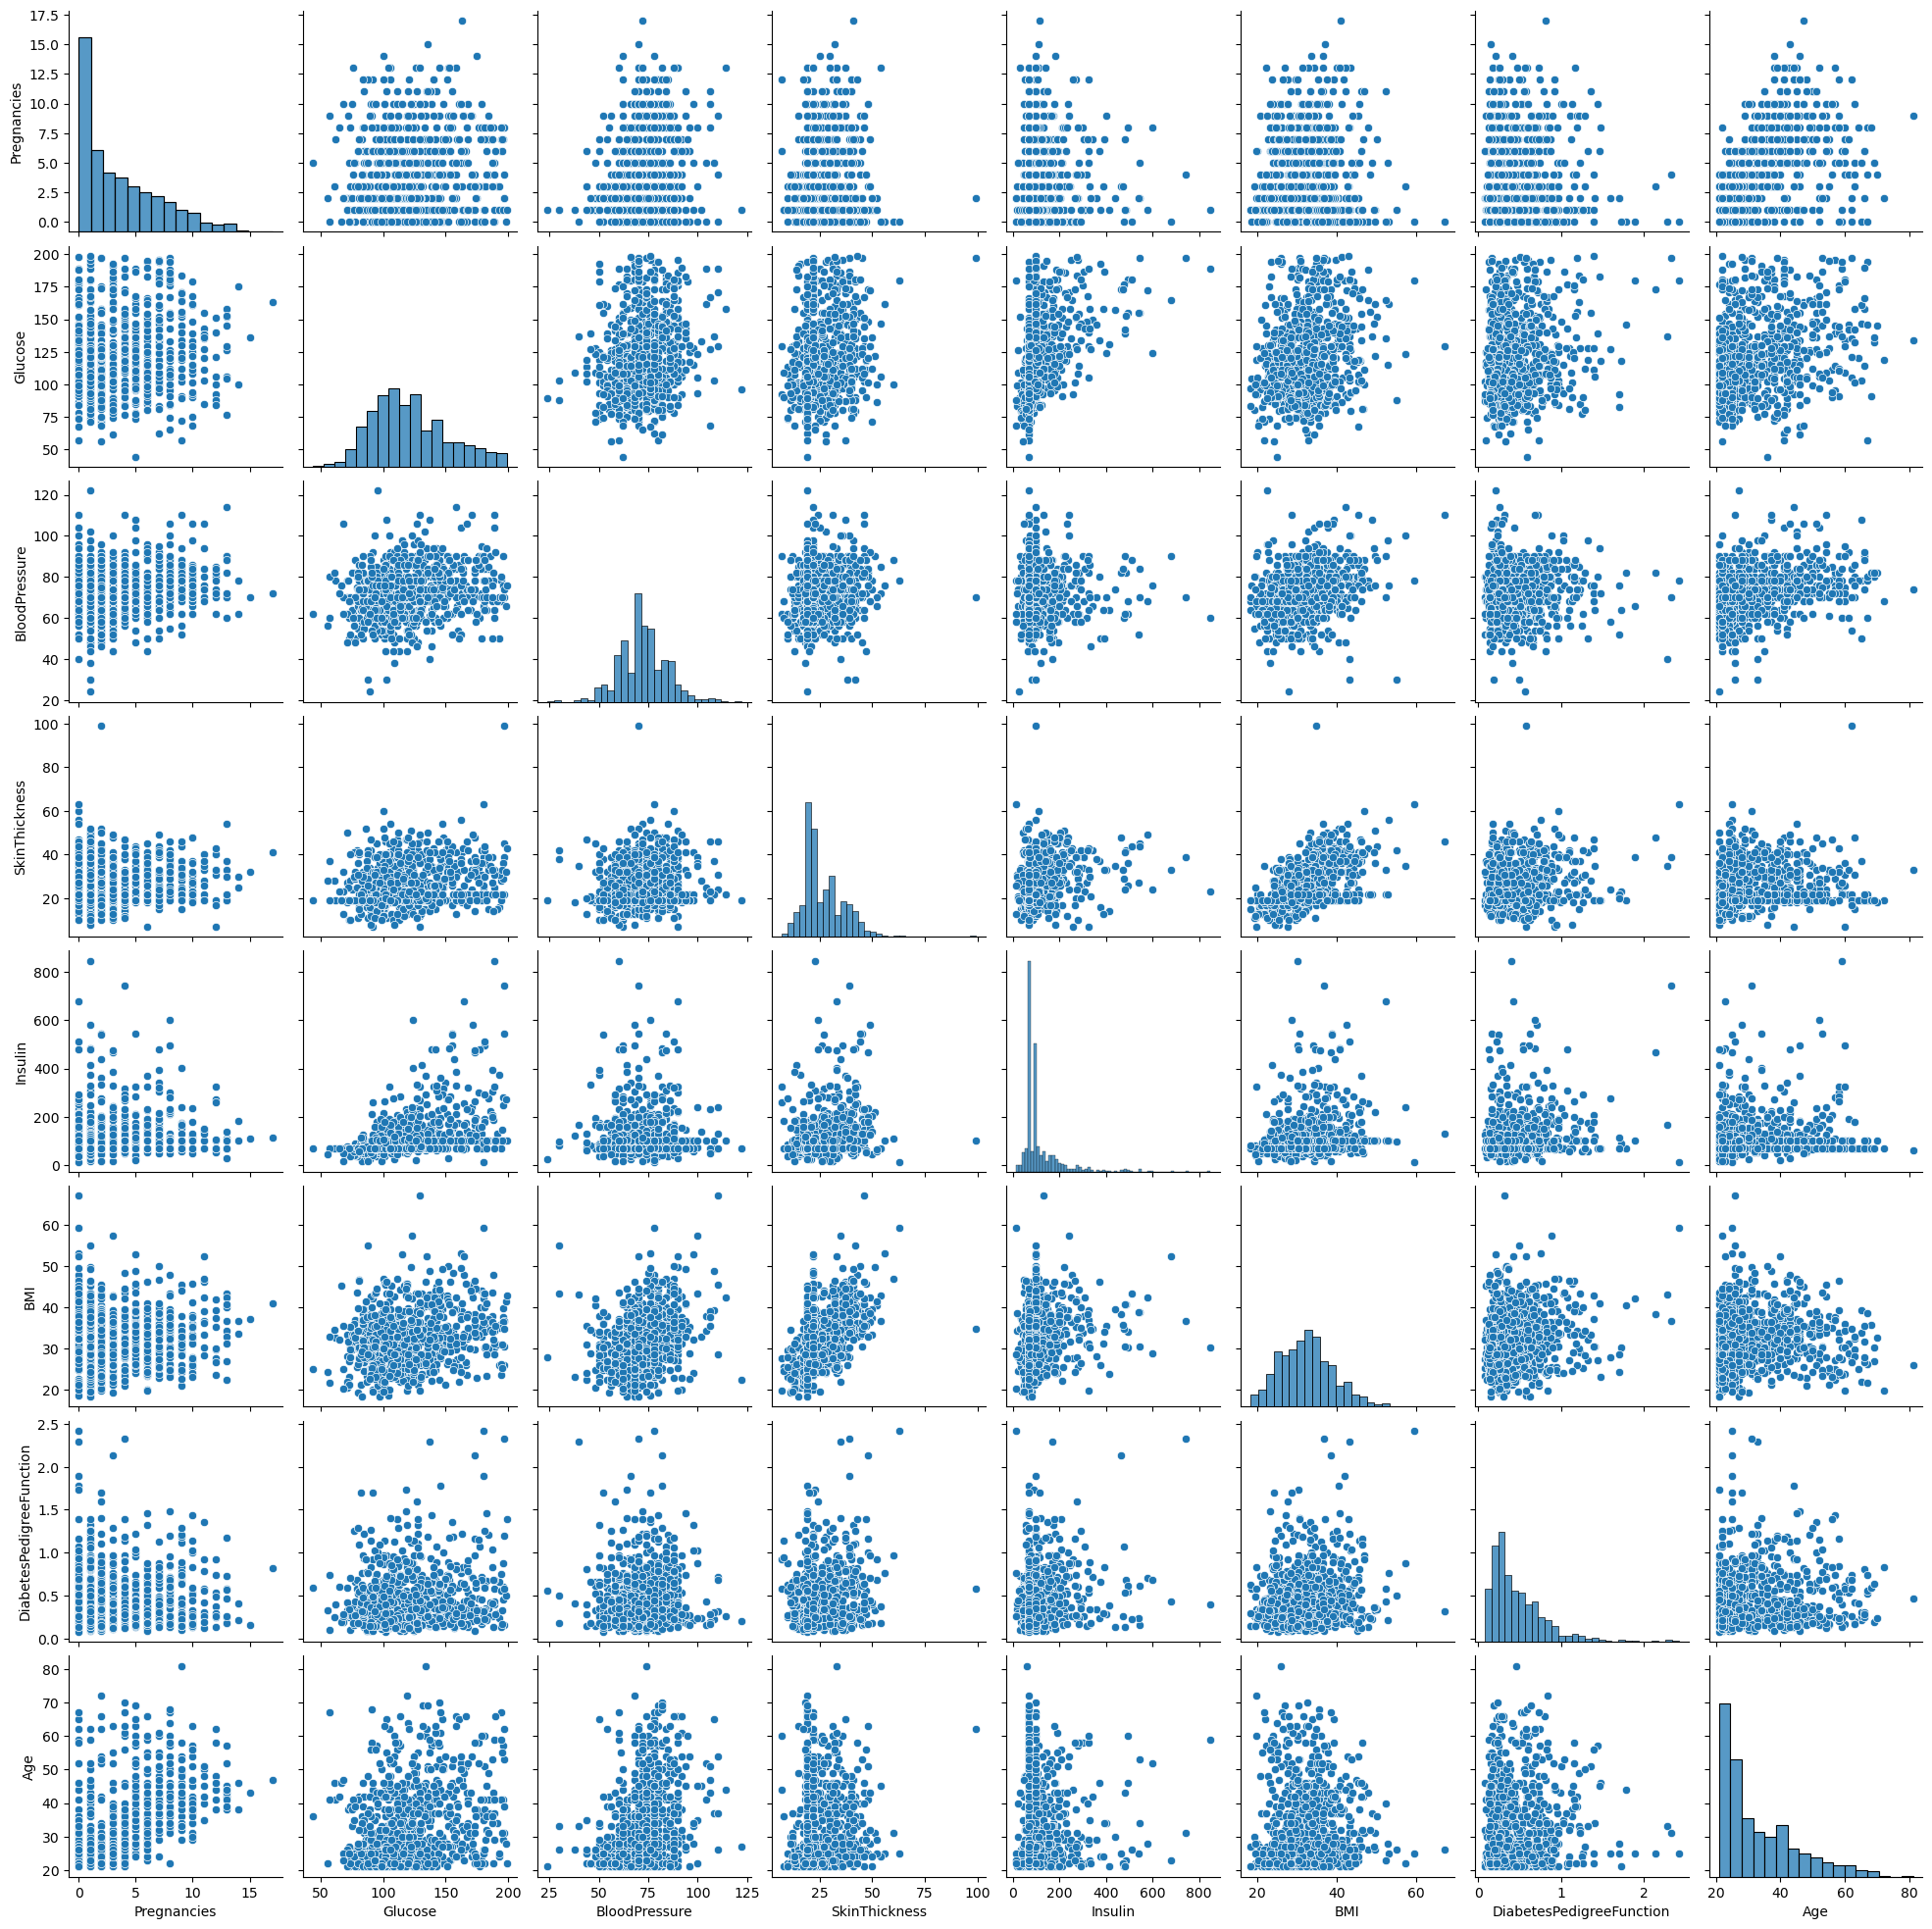

In [510]:
#exclude outcome
df_independant = diabetes_df.drop(columns=['Outcome'])

sns.pairplot(df_independant)
plt.show()

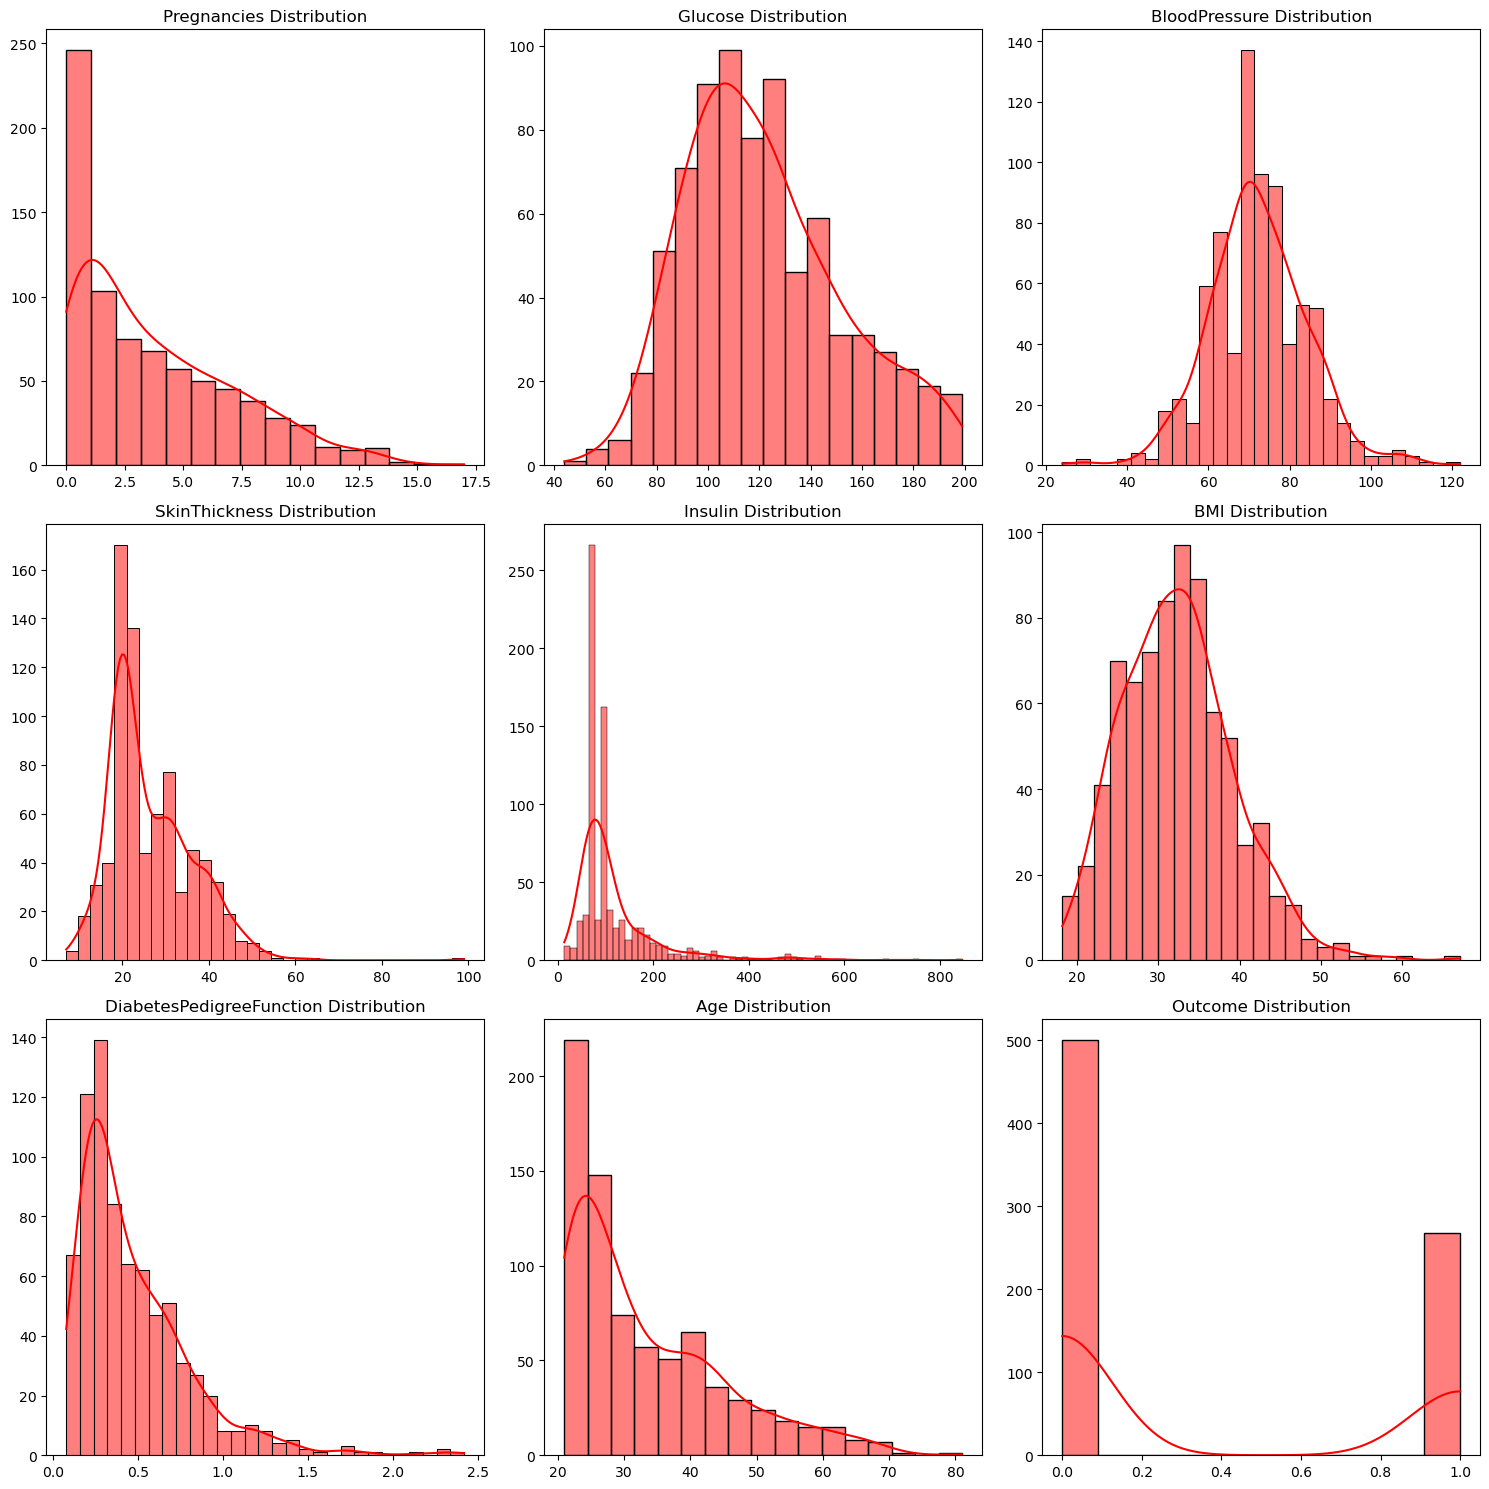

In [511]:
#iteratively check the distribution of each variable using a histogram after imputation
cols = diabetes_df.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(diabetes_df[col], ax=ax, kde=True, color='red')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

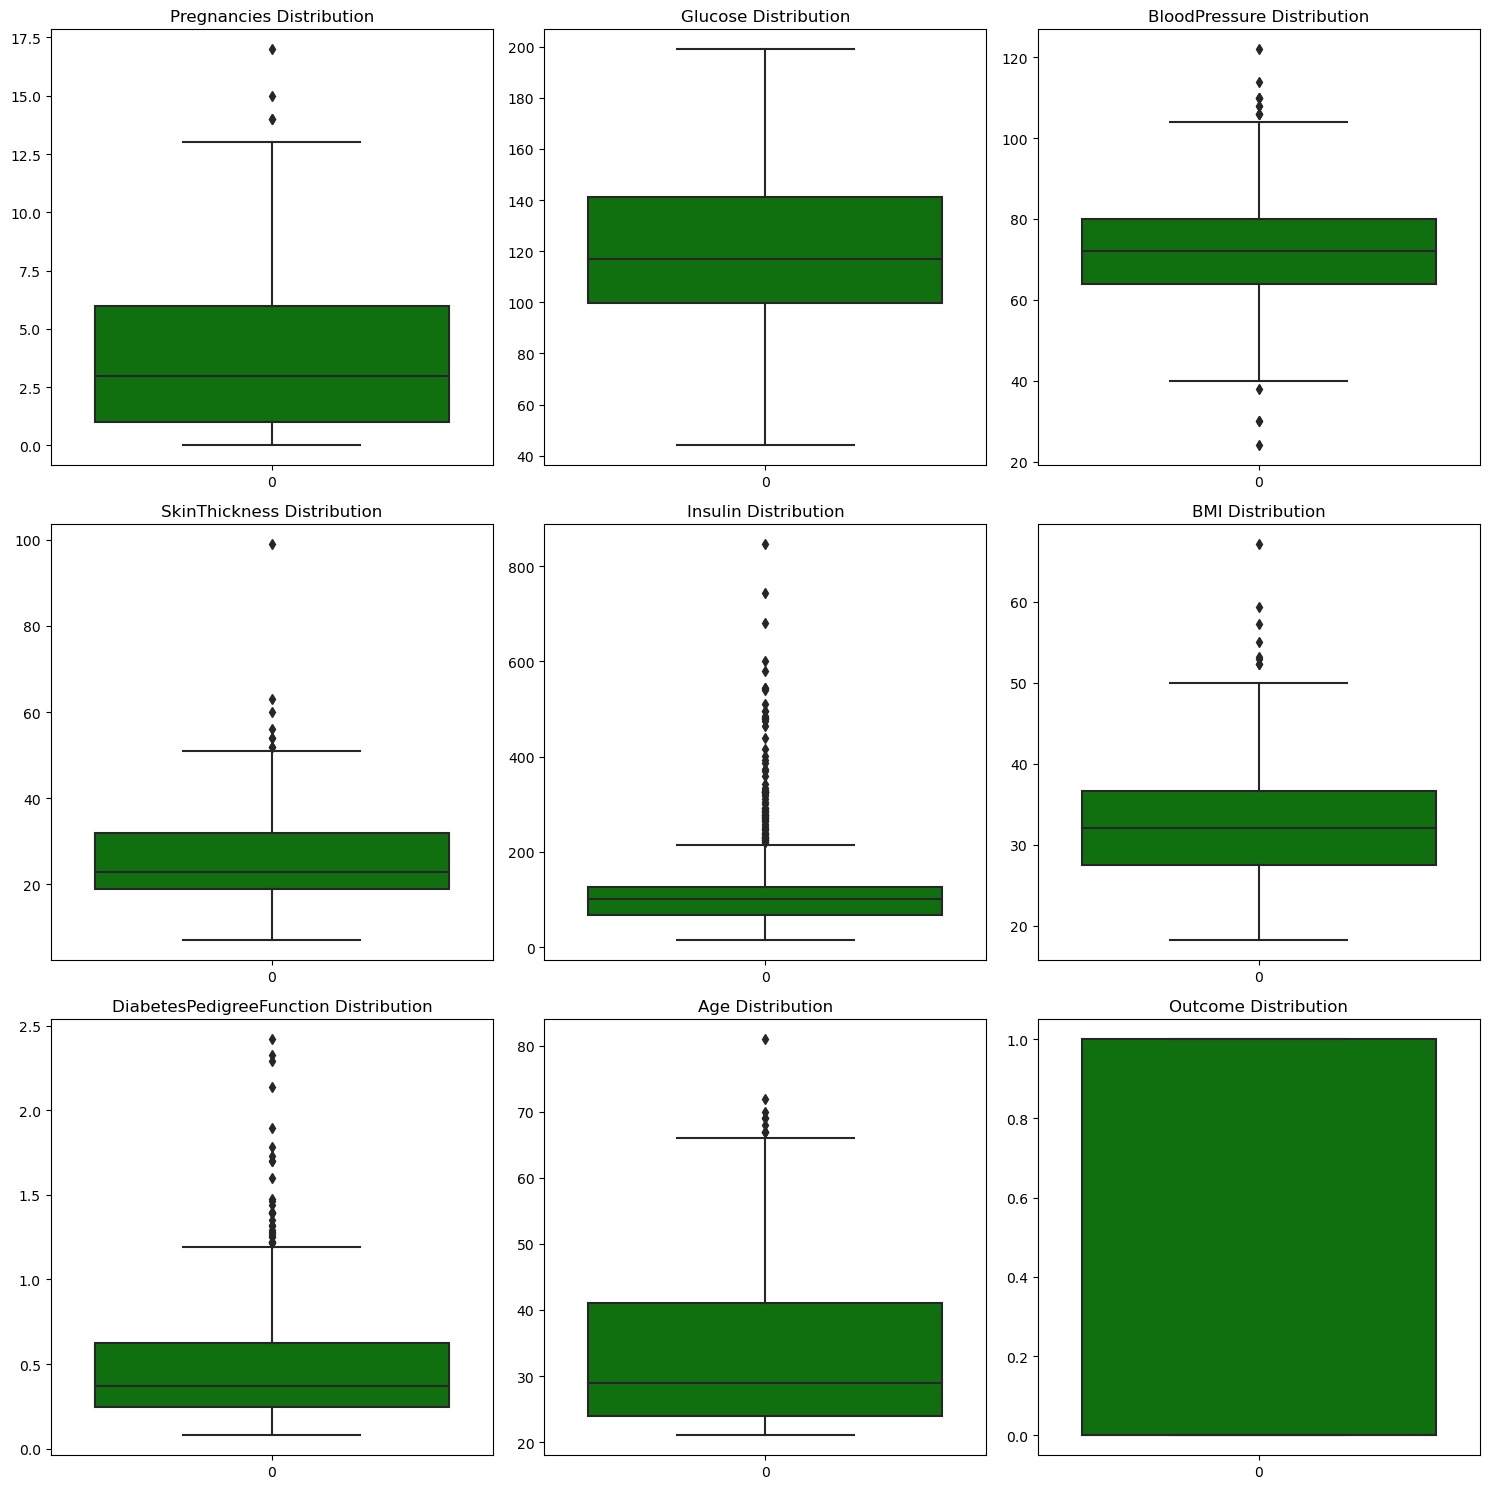

In [512]:
#iteratively check for outliers of each variable using a histogram after imputation
cols = diabetes_df.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(diabetes_df[col], ax=ax, color='Green')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

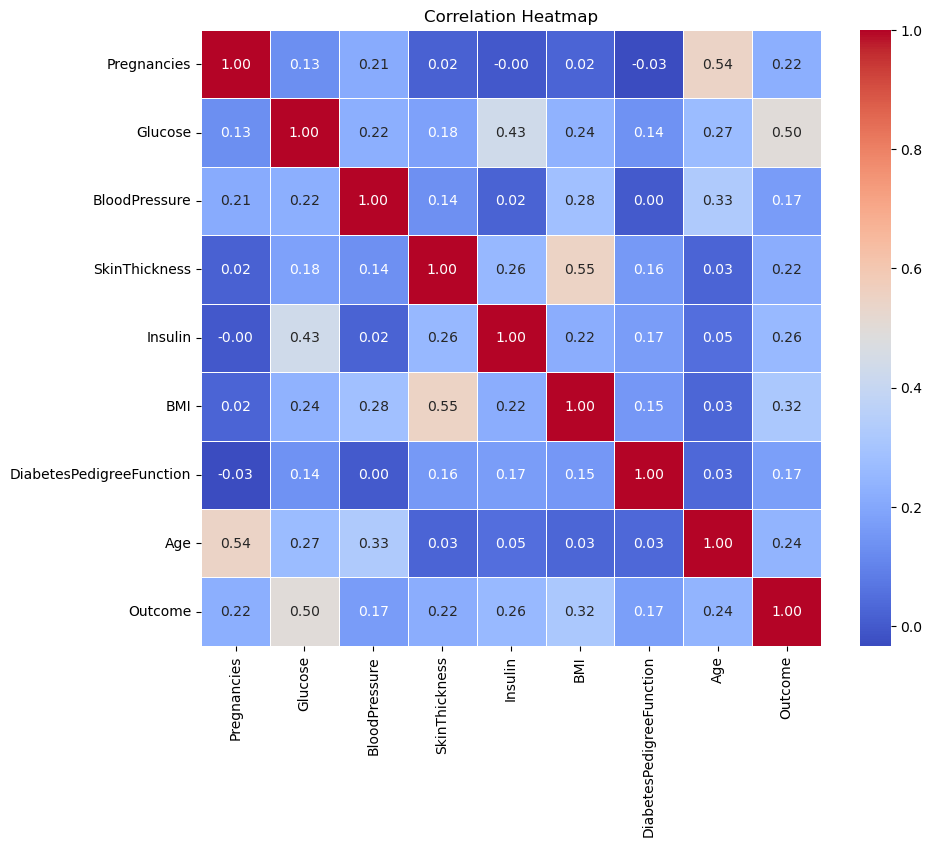

In [513]:
corr_matrix = diabetes_df.corr()
# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [514]:
#Average age
age = diabetes_df['Age'].mean()
print(f'Average age: {age}')

Average age: 33.240885416666664


Diabetic BMI Score: 35.40479505457787
Non-Diabetic BMI Score: 30.849600000000002


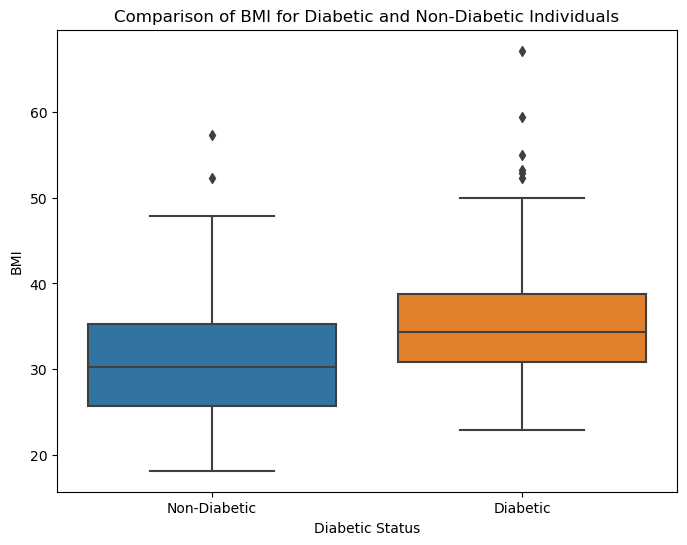

In [515]:
#Average BMI for diabetic vs non-diabetic
diabetic_bmi = diabetes_df[diabetes_df['Outcome'] == 1]['BMI']
non_diabetic_bmi = diabetes_df[diabetes_df['Outcome'] == 0]['BMI']

print(f'Diabetic BMI Score: {diabetic_bmi.mean()}\nNon-Diabetic BMI Score: {non_diabetic_bmi.mean()}')

#plot the comparison

# Create a box plot to compare the distributions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=diabetes_df)
plt.xlabel('Diabetic Status')
plt.ylabel('BMI')
plt.title('Comparison of BMI for Diabetic and Non-Diabetic Individuals')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

Average Diabetic Glucose Level: 142.3097014925373
Average Non-Diabetic Glucose Level: 110.634


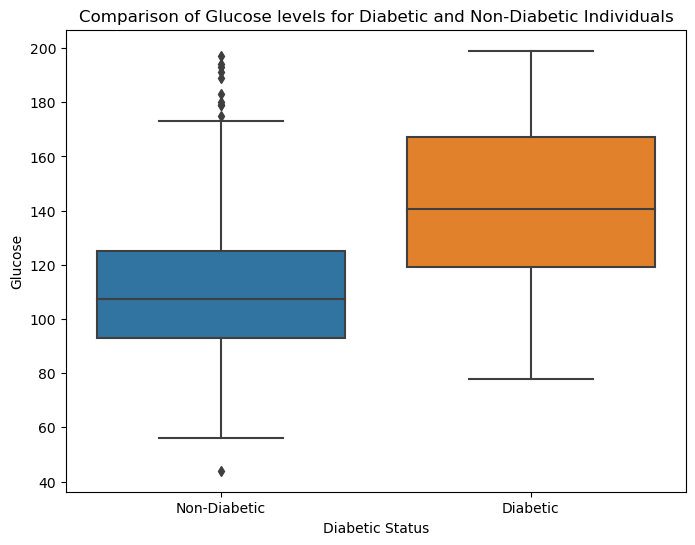

In [516]:
#Average Glucose for diabetic vs non-diabetic
diabetic_glucose = diabetes_df[diabetes_df['Outcome'] == 1]['Glucose']
non_diabetic_glucose = diabetes_df[diabetes_df['Outcome'] == 0]['Glucose']

print(f'Average Diabetic Glucose Level: {diabetic_glucose.mean()}\nAverage Non-Diabetic Glucose Level: {non_diabetic_glucose.mean()}')

#plot the comparison

# Create a box plot to compare the distributions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)
plt.xlabel('Diabetic Status')
plt.ylabel('Glucose')
plt.title('Comparison of Glucose levels for Diabetic and Non-Diabetic Individuals')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

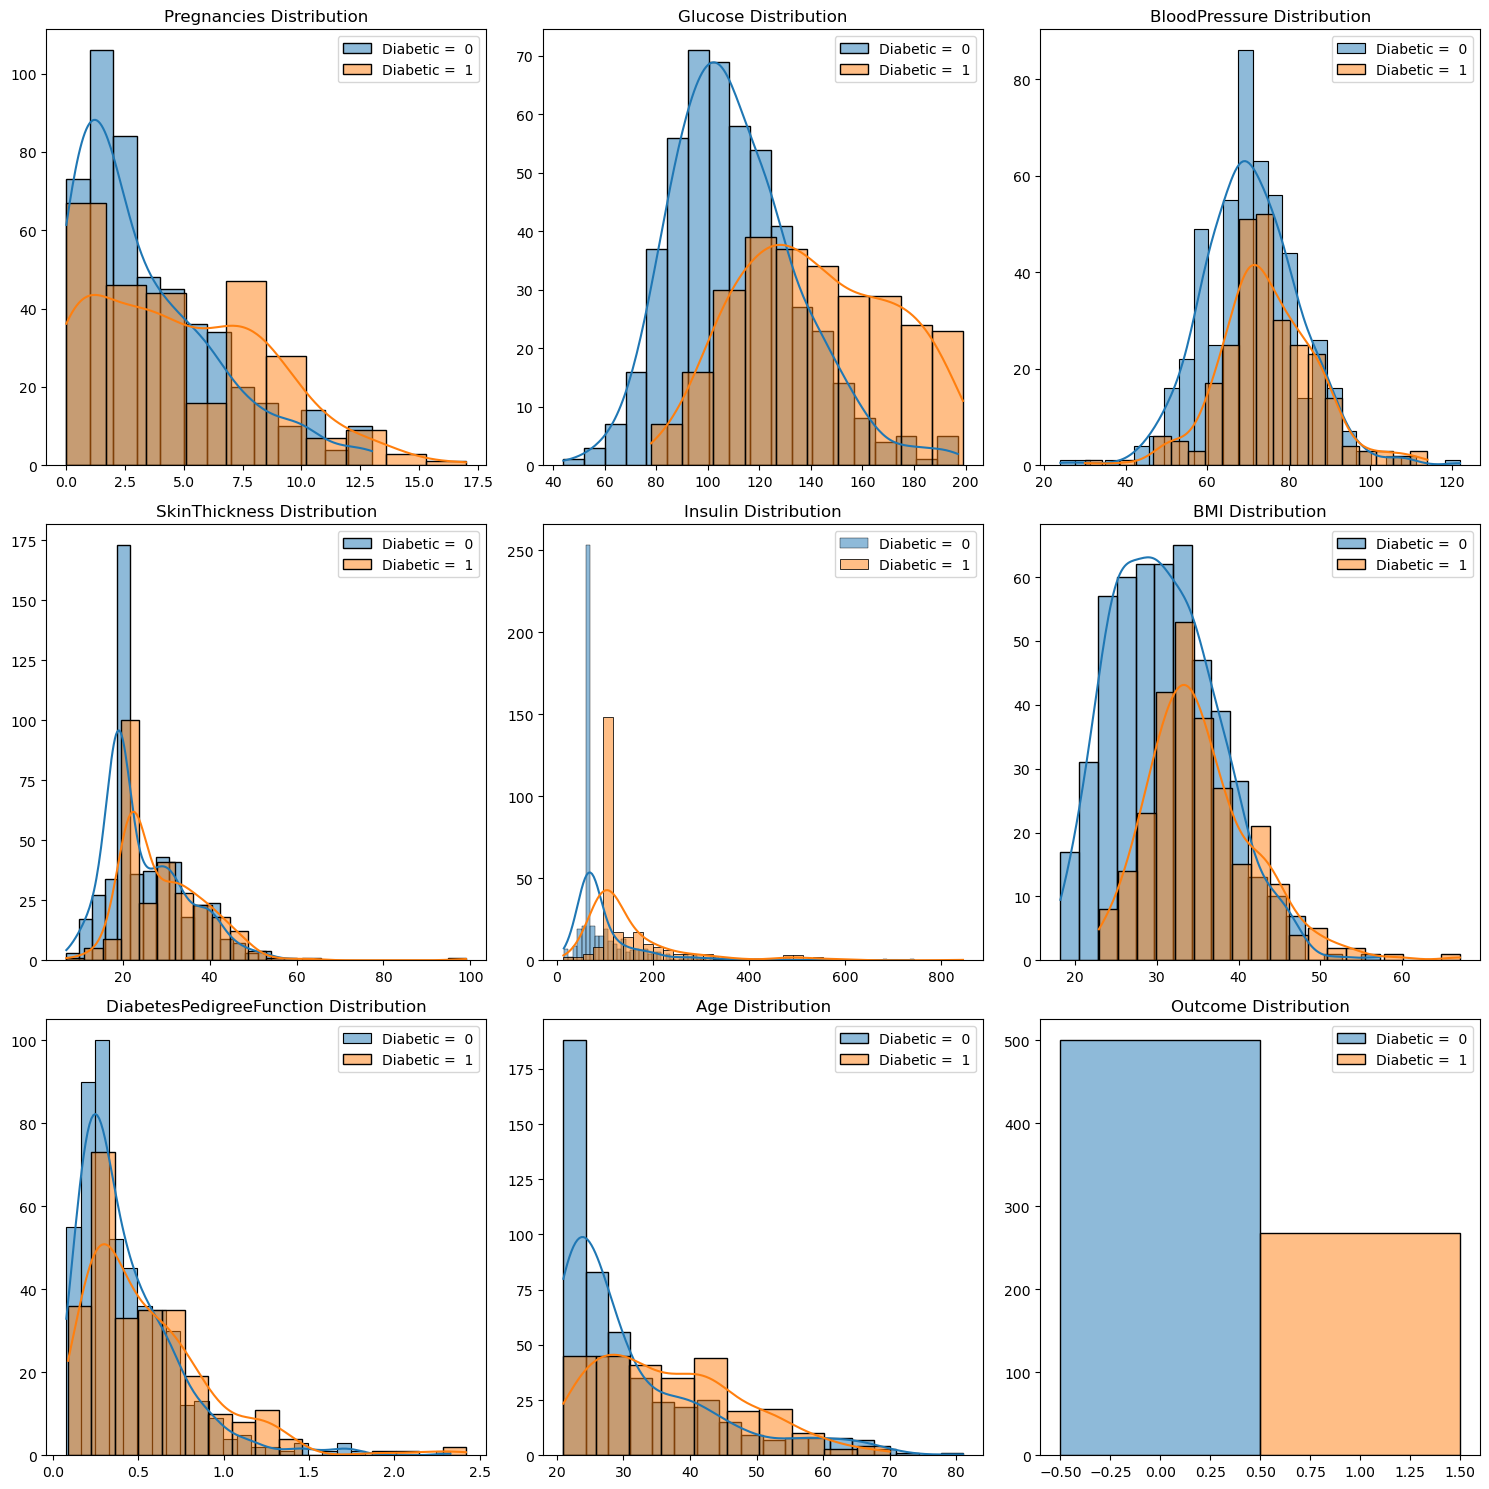

In [517]:
#iteratively check the distribution of each variable using a histogram after imputation
cols = diabetes_df.columns

outcome_grouping = diabetes_df.groupby(diabetes_df['Outcome'])

#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

#compare the distributions
for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    for group, group_data in outcome_grouping:
        sns.histplot(group_data[col], ax=ax, kde=True, label=f'Diabetic =  {group}')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label
    ax.legend()

plt.tight_layout()
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [518]:
from sklearn.preprocessing import StandardScaler

In [519]:
def z_score(column, threshold=2):
    z_score = (column - column.mean()) / column.std()
    return np.abs(z_score < threshold)

In [520]:
diabetes_no_outliers = diabetes_df[diabetes_df.apply(z_score).all(axis=1)]
diabetes_no_outliers.shape

(563, 9)

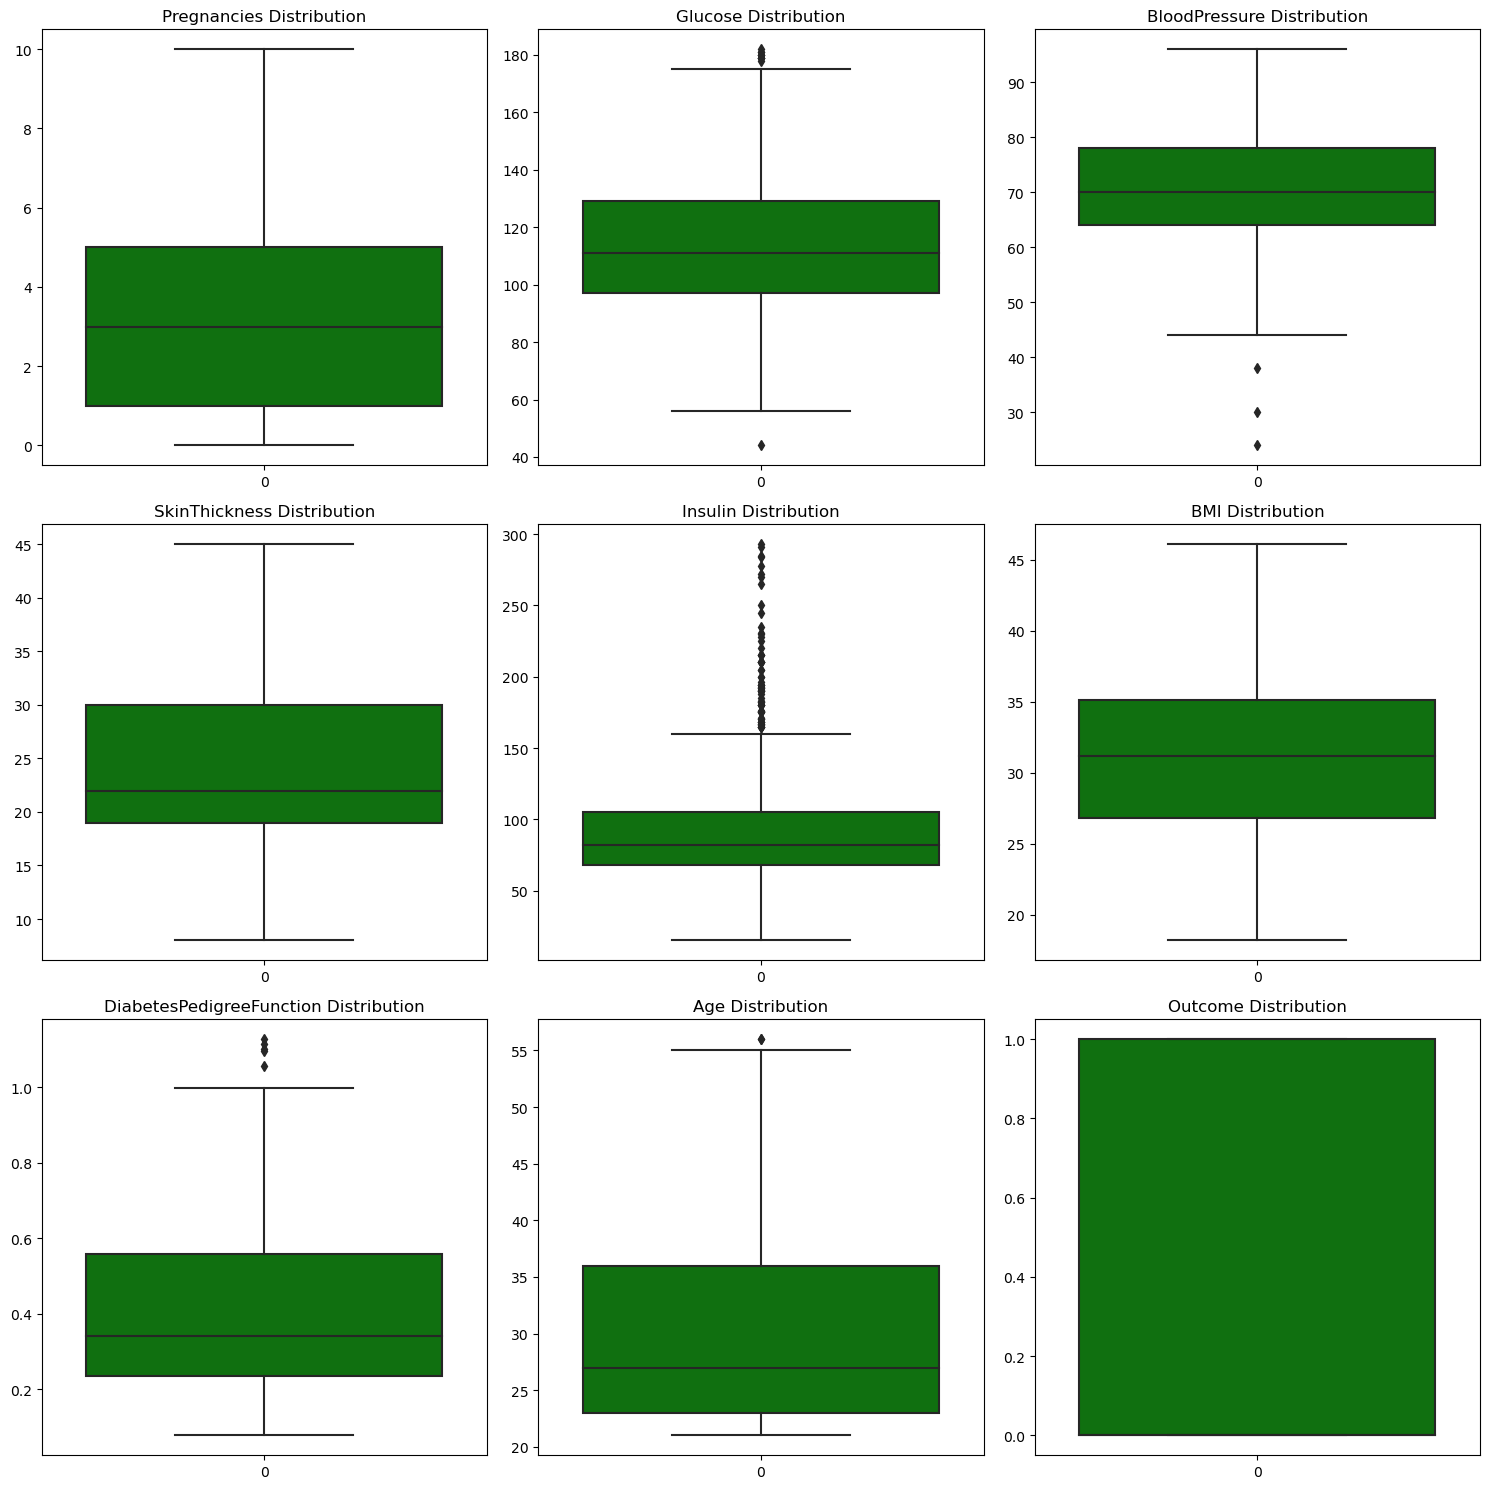

In [521]:
#check for outliers after Z-standardization
cols = diabetes_no_outliers.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(diabetes_no_outliers[col], ax=ax, color='Green')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

In [522]:
diabetes_no_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,3.321492,114.873890,70.332149,24.866785,97.611012,31.310808,0.408680,30.222025,0.277087
std,2.791959,25.692545,10.694137,8.004115,47.612908,5.994349,0.229709,8.831081,0.447958
min,0.000000,44.000000,24.000000,8.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,19.000000,68.000000,26.850000,0.235500,23.000000,0.000000
50%,3.000000,111.000000,70.000000,22.000000,82.000000,31.200000,0.342000,27.000000,0.000000
75%,5.000000,129.000000,78.000000,30.000000,105.000000,35.100000,0.559500,36.000000,1.000000
max,10.000000,182.000000,96.000000,45.000000,293.000000,46.100000,1.127000,56.000000,1.000000


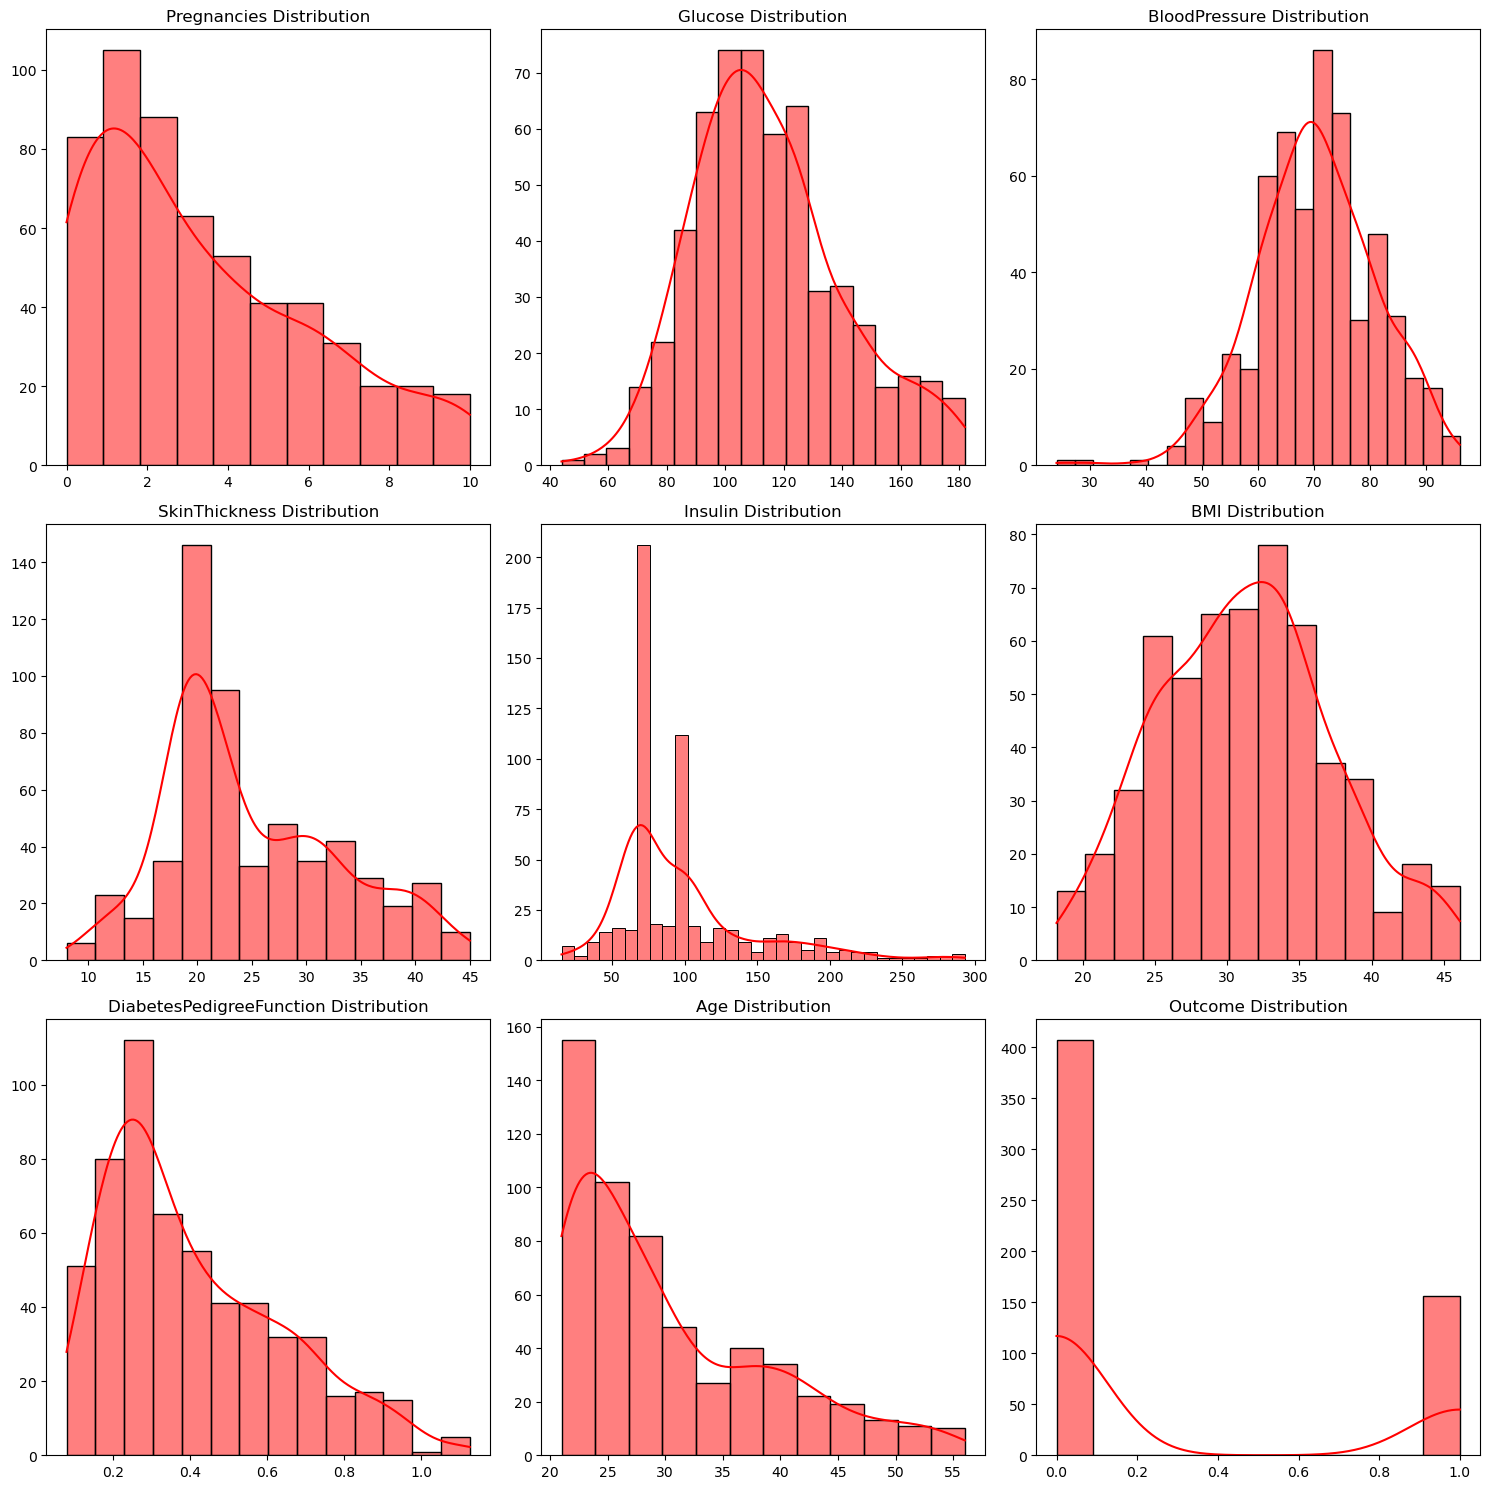

In [523]:
#check the distributions now
cols = diabetes_no_outliers.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(diabetes_no_outliers[col], ax=ax, kde=True, color='red')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

In [524]:
#test trasnformations on right skewed data
right_skew = diabetes_no_outliers[['DiabetesPedigreeFunction', 'Age', 'Insulin', 'SkinThickness', 'Pregnancies']]
sqrt_transformed_data = np.sqrt(right_skew)
sqrt_df = pd.DataFrame(sqrt_transformed_data, columns=right_skew.columns)

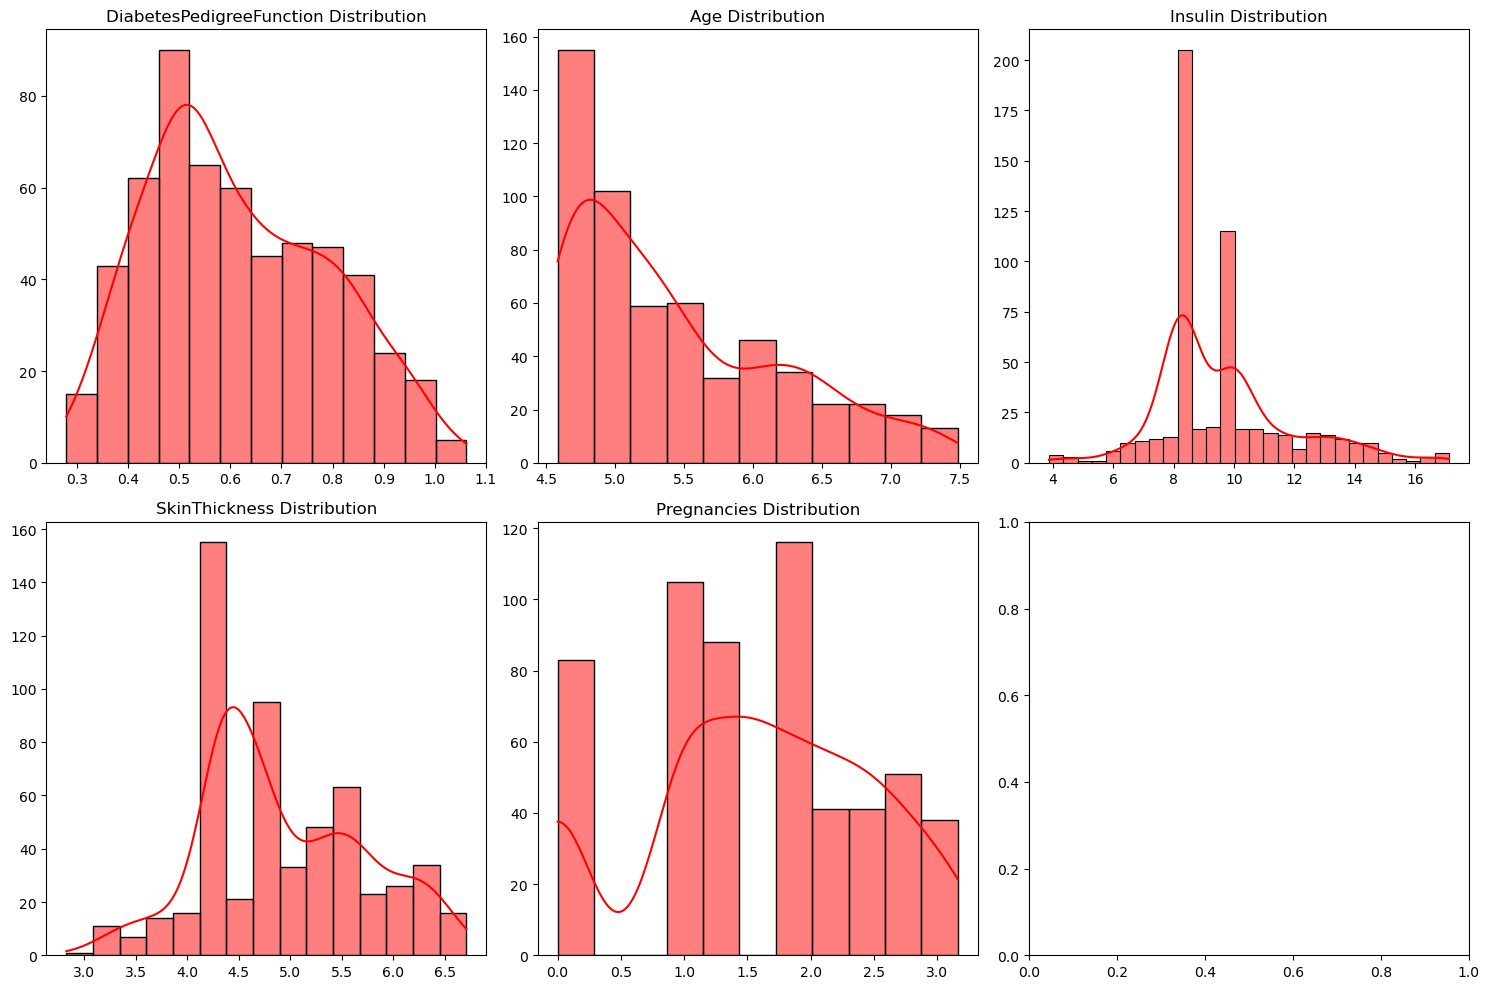

In [525]:
#check the distributions now
cols = sqrt_df.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(sqrt_df[col], ax=ax, kde=True, color='red')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

In [526]:
#from sqrt transform keep it on diabetespredigree, skinthickness and insulin
columns_to_transform = [['DiabetesPedigreeFunction', 'SkinThickness', 'Insulin']]

for col in columns_to_transform:
    diabetes_no_outliers[col] = np.sqrt(diabetes_no_outliers[col])

/var/folders/59/vc05kjdn7s14r9w654dq4xlh0000gn/T/ipykernel_85069/1774814861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_no_outliers[col] = np.sqrt(diabetes_no_outliers[col])


In [527]:
y = diabetes_no_outliers['Outcome']
X = diabetes_no_outliers.drop(columns=['Outcome'])
#scale the variables
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scaled_df = pd.DataFrame(scaled_X, columns=[X.columns])


In [528]:
print(scaled_X.shape)
print(y.shape)

(563, 8)
(563,)


In [529]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.960218,1.290474,0.156098,1.255265,0.167514,0.382231,1.009305,2.241579
1,-0.832232,-1.163779,-0.405456,0.583791,-0.627881,-0.786574,-0.126939,0.088173
2,-0.832232,-1.007954,-0.405456,-0.161568,0.029351,-0.536116,-1.174369,-1.045198
3,0.601728,0.043869,0.343283,-0.714178,-0.627881,-0.953546,-0.948273,-0.025164
4,-0.115252,-1.436474,-1.902933,0.927410,-0.113297,-0.051896,-0.665235,-0.478512


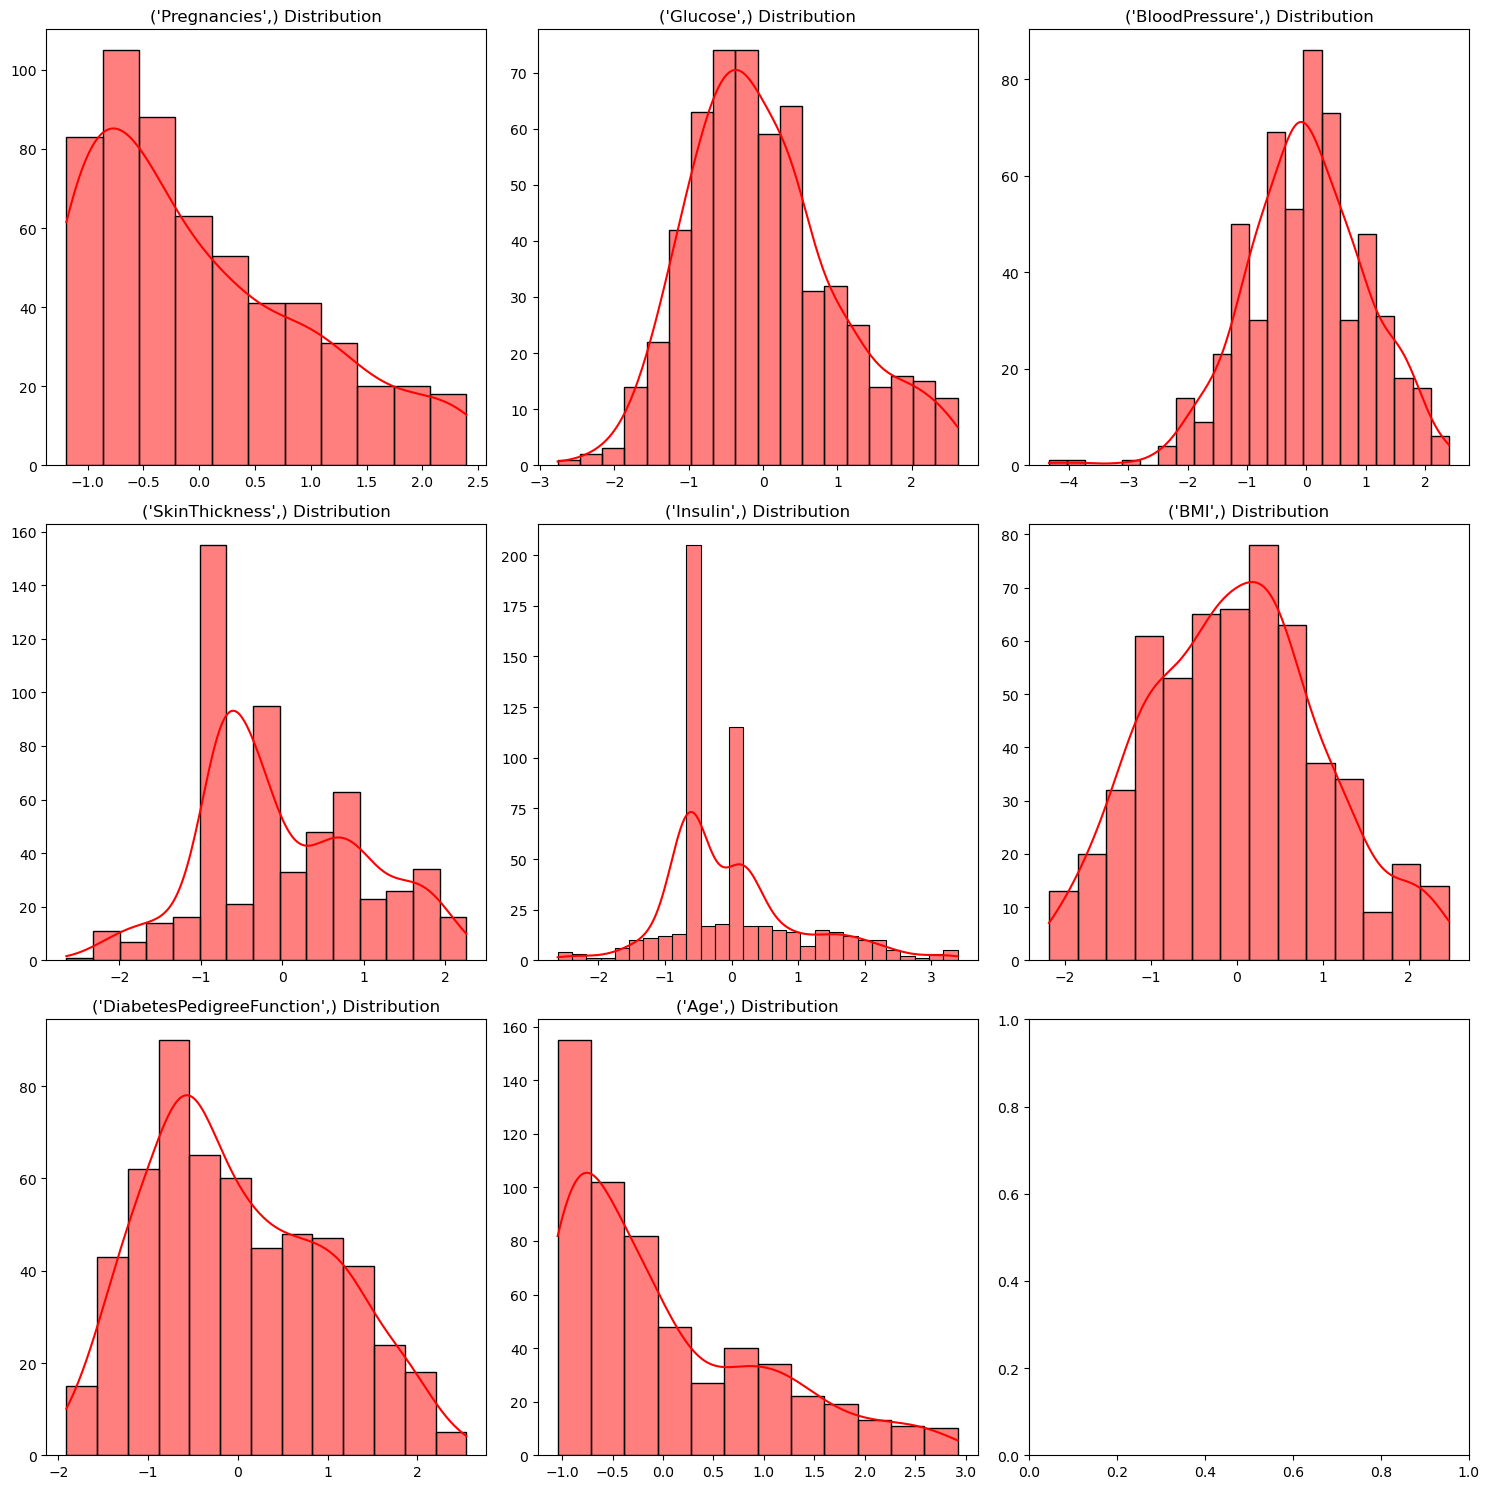

In [530]:
#check the distributions now
cols = scaled_df.columns
#get number of rows with 2 plots / column
num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, col in enumerate(cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(scaled_df[col], ax=ax, kde=True, color='red')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [628]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV

In [532]:
#split the data
X = scaled_X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [552]:
def cross_validation(model, param_dist, X, y, cv=None):
    if cv == None:
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=25, cv=cv)
    search.fit(X, y)
    best_score = search.best_score_
    best_model = search.best_estimator_
    cv_scores = search.cv_results_['mean_test_score']
    pd.set_option('display.max_colwidth', None)
    return best_score, best_model, cv_scores

In [534]:
#find the best hyperparameters for the models
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

#ElasticNet parameters
rf_params = {
    "n_estimators": [150, 175, 180, 200, 225],         
    "criterion": ["gini", "entropy"],        
    "max_depth": [None, 10, 20],             
    "min_samples_split": [2, 5, 10],        
    "min_samples_leaf": [1, 2, 4],         
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False],             
    "random_state": [42]                    
}


cross_validation(random_forest, rf_params, X_train, y_train)

(0.9,
 RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                        min_samples_leaf=2, min_samples_split=10,
                        n_estimators=225, random_state=42),
 array([0.88      , 0.89333333, 0.87777778, 0.88222222, 0.87777778,
        0.87777778, 0.88666667, 0.89111111, 0.89555556, 0.88888889,
        0.88222222, 0.88      , 0.87555556, 0.88666667, 0.89777778,
        0.9       , 0.89111111, 0.89333333, 0.88      , 0.88444444,
        0.88444444, 0.88888889, 0.88888889, 0.88      , 0.88222222]))

In [619]:
random_forest_opt =  RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=10,
                        max_features='log2', min_samples_leaf=2,
                        min_samples_split=10, n_estimators=225, random_state=42)

random_forest_opt.fit(X_train, y_train)

y_pred_rf = random_forest_opt.predict(X_test)

In [621]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')
print('Confusion Matrix:') 
print(confusion_matrix(y_test, y_pred_rf))
print(f'ROC score: {roc_auc_score(y_test, y_pred_rf)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))




Accuracy Score: 0.9557522123893806
Confusion Matrix:
[[88  1]
 [ 4 20]]
ROC score: 0.9110486891385767
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.95      0.83      0.89        24

    accuracy                           0.96       113
   macro avg       0.95      0.91      0.93       113
weighted avg       0.96      0.96      0.95       113

Feature Importances:


In [627]:
feature_importances = random_forest_opt.feature_importances_

#sort the most important features from the random forest
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = scaled_df.columns[sorted_indices]

for feature_name, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{feature_name}: {importance}")

('Insulin',): 0.499251689429864
('Glucose',): 0.1428901541677546
('SkinThickness',): 0.13233020109169236
('Age',): 0.07720124372009589
('BMI',): 0.055713243339625435
('DiabetesPedigreeFunction',): 0.04326193110629816
('Pregnancies',): 0.02658764335816554
('BloodPressure',): 0.02276389378650406


In [600]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

xgb_params = {        
    "n_estimators": [125, 135, 140, 145, 150],     
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.5],  
    "max_depth": [3, 5, 7],
    "max_leaves": [1, 3, 5],             
    "subsample": [0.8, 0.9, 1.0],      
    "gamma": [0, 0.1, 0.5, 1.0, 1.5, 2.0],
    "reg_alpha": [0, 0.05, 0.1, 0.5, 1.0],        
    "reg_lambda": [0, 0.05, 0.1, 0.5, 1.0], 
    "booster" : ['gbtree', 'gblinear', 'dart']
}

cross_validation(xgb, xgb_params, X_train, y_train)

[18:07:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1685694848790/work/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "max_leaves", "subsample" } are not used.

[18:07:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1685694848790/work/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "max_leaves", "subsample" } are not used.

[18:07:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1685694848790/work/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "max_leaves", "subsample" } are not used.

[18:07:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1685694848790/work/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "max_leaves", "subsample" } are not used.

[18:07:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1685694848790/work/src/learner.cc:767: 
Parameters: { "gamma", "max_depth", "max_leaves", "subsample" } are not used.

[18:07:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboo

(0.9,
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=5,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=145, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=42, ...),
 array([0.88888889, 0.89111111, 0.88444444, 0.9       , 0.70666667,
        0.89111111, 0.87777778, 0.88666667, 0.89777778, 0.87777778,
        0.89111111, 0.88222222, 0.70666667, 0.88444444, 0.89333333,
        0.75111111, 0.87555556, 

In [613]:
xgb_classifier = XGBClassifier(n_estimators=125, gamma=2.0, learning_rate=0.05, max_depth=3, max_leaves=5,
                               random_state=42, booster='gbtree', reg_alpha=0.1, reg_lambda=0.1)

xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)

y_prob_xgb = xgb_classifier.predict_proba(X_test)

In [614]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_xgb)}')
print('Confusion Matrix:') 
print(confusion_matrix(y_test, y_pred_xgb))
print(f'ROC score: {roc_auc_score(y_test, y_pred_xgb)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_xgb))
#0.9469026548672567

Accuracy Score: 0.9469026548672567
Confusion Matrix:
[[86  3]
 [ 3 21]]
ROC score: 0.9206460674157304
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.88      0.88      0.88        24

    accuracy                           0.95       113
   macro avg       0.92      0.92      0.92       113
weighted avg       0.95      0.95      0.95       113



In [626]:
feature_importances = xgb_classifier.feature_importances_

#sort the most important features from XGBoost
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = scaled_df.columns[sorted_indices]

#Print the feature importances with their column names
for feature_name, importance in zip(sorted_feature_names, sorted_feature_importances):
    print(f"{feature_name}: {importance}")


('Insulin',): 0.4116031229496002
('Age',): 0.12564747035503387
('BMI',): 0.1074363961815834
('Glucose',): 0.10355750471353531
('SkinThickness',): 0.10026565194129944
('DiabetesPedigreeFunction',): 0.059828244149684906
('Pregnancies',): 0.05179290473461151
('BloodPressure',): 0.039868708699941635


In [632]:
#Random Forest results
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)

#XGB results
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

# Create a DataFrame to compare the metrics
metrics_df = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'XGBoostClassifier'],
    'Accuracy': [rf_accuracy, xgb_accuracy],
    'Recall': [rf_recall, xgb_recall],
    'Precision': [rf_precision, xgb_precision],
    'F1 Score': [rf_f1, xgb_f1]
})

metrics_df

,Model,Accuracy,Recall,Precision,F1 Score
0,RandomForestClassifier,0.955752,0.833333,0.952381,0.888889
1,XGBoostClassifier,0.946903,0.875000,0.875000,0.875000


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The model accuracy was slightly better for the RandomForest than XGBoost at predicting whether or not an individual has diabetes based on the feature variables provided
- The three most important features for prediction according to the RandomForestClassifier were Insulin, Glucose, and SkinThickness whereas in the XGBoostClassifier the three most important features for prediction were Insulin, Age, and BMI
- While the RandomForestClassiffier has a higher accuracy score and percision , XGBoost has a better recall score, and the F1 scores are very close in value. The reason the recall value difference is important is because it means that there are fewer false negatives, this is important because a false negative classification for an individual with diabetes is life thretaning, since they will persumably not recieve adequate treatment.
- According to the heatmap of correlation the most highly correlated feature with the outcome was the level of Glucose, this is interesting because it was not the most important feature in either of the models